# Taller # 1 - Ciencia de Datos

Oscar Javier Angel Balcázar

**Objetivo**
Evaluar las capacidades del estudiante para realizar análisis de datos utilizando técnicas estadísticas y de visualización que permitan entender un conjunto de datos, descubrir insights y plantear hipótesis de negocio.

**Descripción**

Para este taller se utilizará una base de datos de Spotify en donde se encuentran las canciones más escuchadas incluyendo características tanto intrínsecas como extrínsecas de cada canción. A continuación, se relaciona el diccionario de datos:


|Field |Description |
|------|------------|
|artist |Song`s artist |
|song |Name of the Track |
|duration_ms |Duration of the track in milliseconds |
|explicit |Explicit content |
|year | Release Year of the track |
|popularity |The higher the value the more popular the song is |
|danceability |A value of 0.0 is least danceable and 1.0 is most danceable |
|energy |Represents a perceptual measure of intensity and activity |
|key |The key the track is in |
|loudness |The overall loudness of a track in decibels (dB) |
|mode |The modality (major or minor) of a track |
|speechiness |Speechiness detects the presence of spoken words in a track |
|acousticness |A confidence measure from 0.0 to 1.0 of whether the track is acoustic |
|instrumentalness |Predicts whether a track contains no vocals |
|liveness |Detects the presence of an audience in the recording |
|valence |A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track |
|tempo |The overall estimated tempo of a track in beats per minute (BPM) |
|genre |Genre of the track |

**Actividades**

Responda cada una de las preguntas de negocio utilizando las técnicas y
herramientas vistas en clase. En la medida de lo posible, responda cada pregunta
aplicando una técnica estadística acompañada de una visualización.

##### A. **Importando librerías.**

In [43]:
!pip install --upgrade pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
# Importing libraries

import numpy as np
import pandas as pd
import csv
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
import matplotlib.pyplot as plt

#### B. **Lectura del DataSet**

In [45]:
# Loading the CSV file as dataframe
pd.set_option('display.max_rows', None)
spotify_df = pd.read_csv('https://raw.githubusercontent.com/ojangelb/MINE-4101/main/Taller_1/dataset/Data_Taller_1.csv', error_bad_lines=False)


b'Skipping line 1977: expected 18 fields, saw 19\n'


In [46]:
# Columns name
columns_name = ['artist','song','duration_ms','explicit','year','popularity','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','genre']


In [47]:
# Dataframe split with null and not null columns
spotify_not_null_df = spotify_df[spotify_df['song'].notnull()]
spotify_not_null_df.columns = columns_name
spotify_null_df = spotify_df[spotify_df['song'].isnull()]

In [48]:
# Split string data in a new DataFrame
spotify_null_df = spotify_null_df['artist'].str.split(',', n=17, expand=True)
spotify_null_df.columns = columns_name


In [49]:
spotify_null_df_temp = spotify_null_df[(spotify_null_df['explicit']=='False') | (spotify_null_df['explicit']=='True')]
spotify_null_df_temp_error = spotify_null_df[(spotify_null_df['explicit']!='False') & (spotify_null_df['explicit']!='True')]
spotify_null_df_temp_error['song'] = spotify_null_df_temp_error['song'] + spotify_null_df_temp_error['duration_ms']
spotify_null_df_temp_error = spotify_null_df_temp_error.drop('duration_ms', axis=1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
spotify_null_df_temp_error[['column_tempo', 'column_genre']] = spotify_null_df_temp_error['genre'].str.split(',', 1, expand=True)
spotify_null_df_temp_error = spotify_null_df_temp_error.drop('genre', axis=1)
spotify_null_df_temp_error.columns = columns_name
spotify_fixed_data_dt = spotify_null_df_temp_error[(spotify_null_df_temp_error['explicit']=='False') | (spotify_null_df_temp_error['explicit']=='True')]

Debido a que no toda la información del dataset era uniforme y tenia caractéres especiales que dificultaban su lectura, decidi ir fracmentando el dataset para atacar cada conjunto de datos e ir organizando la estructura de los mismos de acuerdo a la descripción del taller.

In [51]:
# Append DataFrames
songs_df = pd.concat([spotify_fixed_data_dt, spotify_null_df_temp, spotify_not_null_df])
songs_df.shape

(1991, 18)

In [52]:
# Duplicate rows are removed after adjusting data from different DataFrame
songs_df = songs_df.drop_duplicates()
songs_df.shape

(1932, 18)

Se eliminaron 59 filas duplicadas del dataset original.

In [53]:
# Replace special characteres in columns
songs_df['genre'] = songs_df['genre'].str.replace(';', '').str.replace('"', '')
songs_df['song'] = songs_df['song'].str.replace('"', '')

In [54]:
# Set data types in DataFrame

songs_df['duration_ms'] = pd.to_numeric(songs_df['duration_ms']) 
songs_df['popularity'] = pd.to_numeric(songs_df['popularity'])
songs_df['danceability'] = pd.to_numeric(songs_df['danceability'])
songs_df['energy'] = pd.to_numeric(songs_df['energy'])
songs_df['key'] = pd.to_numeric(songs_df['key'])
songs_df['loudness'] = pd.to_numeric(songs_df['loudness'])
songs_df['mode'] = pd.to_numeric(songs_df['mode'])
songs_df['speechiness'] = pd.to_numeric(songs_df['speechiness'])
songs_df['acousticness'] = pd.to_numeric(songs_df['acousticness'])
songs_df['instrumentalness'] = pd.to_numeric(songs_df['instrumentalness'])
songs_df['liveness'] = pd.to_numeric(songs_df['liveness'])
songs_df['valence'] = pd.to_numeric(songs_df['valence'])
songs_df['tempo'] = pd.to_numeric(songs_df['tempo'])
songs_df = songs_df.astype({"year": int})

# Showing column types
songs_df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
75,Destiny's Child,Jumpin' Jumpin',230200.0,False,1999,70.0,0.771,0.685,1.0,-4.639,1.0,0.0567,0.00543,0.001570,0.0537,0.683,88.997,"pop, R&B"
85,Destiny's Child,Independent Women Pt. 1,221133.0,False,2001,65.0,0.730,0.602,6.0,-3.782,0.0,0.2060,0.36200,0.000004,0.1690,0.927,97.954,"pop, R&B"
106,Shakira,Whenever Wherever,196160.0,False,2001,74.0,0.794,0.832,1.0,-4.862,0.0,0.0407,0.23700,0.000011,0.2030,0.871,107.657,"pop, latin"
210,Diddy,I Need a Girl (Pt. 2) [feat. Loon Ginuwine & M...,285586.0,False,2004,69.0,0.713,0.471,1.0,-7.392,0.0,0.4830,0.42100,0.000000,0.0308,0.779,199.764,"hip hop, pop"
234,Khia,My Neck My Back (Lick It),222560.0,True,2015,59.0,0.859,0.625,9.0,-4.234,0.0,0.1300,0.02960,0.000000,0.0537,0.710,102.072,"pop, R&B"


#### C. **Solución del Taller**

1. Describa el conjunto de datos, tipos de variables y destaque cualquier problema de calidad de datos y procesos de limpieza que deba implementar.

***Proceso de Limpieza de Datos***

Después de la lectura de los datos estos se separan en dos Dataframes, ya que algunas filas tienen la comilla doble (") este carácter evita que se separen en las columnas correspondientes.

Por lo anterior se hace un split `.str.split(',', n=17, expand=True)` en el cual los datos se expanden hasta en 17 columnas de acuerdo a la estructura del DataFrames. Al ejecutar el anterior proceso se unieron los dos Datasets para porder procesar los datos en un único DataFrames. Con la función `columns` se asignan a los DataFrames los nombres de las columnas para unir los conjuntos de datos. Pposteriormente se eliminaron los datos duplicados con la sentencia `songs_df.drop_duplicates()`

Tambien todos los datos de la ultima columna quedaron con el caracter punto y coma (;) se realizó un replace (`songs_df['genre'] = songs_df['genre'].str.replace(';', '').str.replace('"', '')`) sobre los datos de la columna para eliminar este simbolo.


***Tipos de Variables***


|Variable |Clasificación |
|------|------------|
|artist | Cualitativa Nominal |
|song | Cualitativa Nominal |
|duration_ms | Cuantitativa Continua |
|explicit | Cualitativa Ordinal|
|year | Cuantitativa Continua|
|popularity | Cuantitativa Continua |
|danceability | Cuantitativa Continua |
|energy | Cuantitativa Discreta |
|key | Cualitativa Nominal |
|loudness | Cuantitativa Continua|
|mode | Cuantitativa Discreta|
|speechiness | Cuantitativa Continua |
|acousticness | Cuantitativa Continua |
|instrumentalness | Cuantitativa Continua |
|liveness | Cuantitativa Continua |
|valence | Cuantitativa Continua |
|tempo | Cuantitativa Continua |
|genre | Cualitativa Nominal |

2. ¿Cuál es el top 10 de artistas más activos de los últimos 10 años?

In [55]:
print(songs_df['year'].unique())

[1999 2001 2004 2015 2003 2005 2006 2007 2008 2009 2011 2012 2013 2014
 2016 2017 2018 2019 2000 2002 1998 2010 2020]


In [56]:
# filter dataset by year
top_songs = songs_df[(songs_df['year']>=2011)]

top_artist = top_songs['artist'].value_counts()[:10]

In [57]:
# Sort dataset
top_artist = top_artist.sort_values(ascending = True)

In [58]:
iplot(px.bar(top_artist, 
       title='Número de canciones por artista', 
       text_auto='.2s',
       labels=dict(index='Artista',value='Número de canciones'),
       color_discrete_sequence=['#2fece9'],
       width= 600,
       height= 600
      ).update_xaxes(type='category'))

Top 10 de los artistas más populareas.

2.¿Cómo se diferencian las canciones de los géneros de Latin y Folk/Acoustic en relación con su duración? Halle la diferencia del tiempo promedio de ambos géneros.

In [59]:
# Explode the genre column
songs_df.genre = songs_df.genre.apply(lambda x: x.split(", "))
df_genre_exp = songs_df.explode("genre")

In [60]:
# Filter the dataset by musical genre and obtain the mean duration of the songs
songs_filter_genre = df_genre_exp[(df_genre_exp['genre'] == 'latin') | (df_genre_exp['genre'] == 'Folk/Acoustic')]
songs_filter_genre['duration_min'] = songs_filter_genre['duration_ms']/60000

genre_series =  songs_filter_genre.groupby('genre').agg({'duration_min': ['mean']})['duration_min'].squeeze()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
iplot(px.bar(genre_series, 
       title='Tiempo promedio generos Latin y Folk/Acoustic', 
       text_auto='.2s',
       labels=dict(index='Genero',value='Promedio duración min.'),
       color_discrete_sequence=['#2ecf27'],
       width= 500,
       height= 500
      ).update_xaxes(type='category'))

Se puede concluir que el tiempo promedio de los generos Latin y Folk/Acoustic son casi similares con diferencia de un segundo.

4. Halle el top 5 de los géneros del 2019 según la cantidad de canciones. ¿Cómo ha variado la cantidad de canciones del Top de géneros en los años 2000, 2005, 2010, 2015, 2019?

In [62]:
# filter dataset by year
top_genre_year = df_genre_exp[(df_genre_exp['year'].isin([2000, 2005, 2010, 2015, 2019]))]
top_genre = top_genre_year[['year','genre']]
top_genre = top_genre.groupby(['year','genre']).agg({'genre': ['count']})


In [63]:
# Sort dataframe
top_genre = top_genre.sort_values(['year', ('genre', 'count')], ascending=[True, False]).groupby('year').head(5)
top_genre.reset_index(inplace=True)
top_genre.columns = ['year','genre','top']

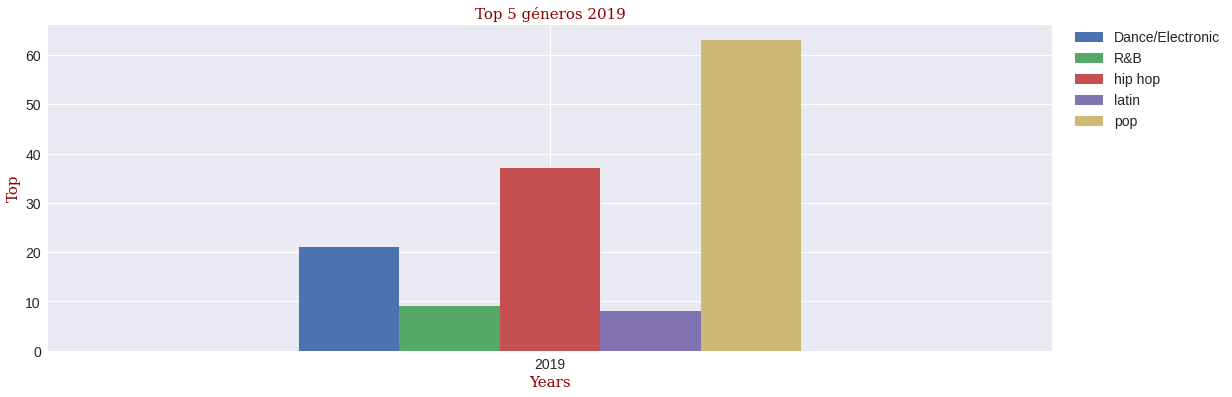

In [64]:
top_genre_2019 = top_genre[(top_genre['year'] == 2019)]
# transform the shape
dfp = top_genre_2019.pivot(index='year', columns='genre', values='top')

# plot
ax = dfp.plot(kind='bar', rot=0, figsize=(18, 6))
font = {'family':'serif','color':'darkred','size':15}
plt.xlabel("Years", font)
plt.ylabel("Top", font)
plt.title("Top 5 géneros 2019", font)
ax.legend(bbox_to_anchor=(1.01, 1.02), loc='upper left', fontsize=14)
plt.style.use('seaborn')
plt.tick_params(labelsize=14)
plt.show()

El top 5 del 2019 es el Pop, gip hop, Dance/Electronic, R&B y latin

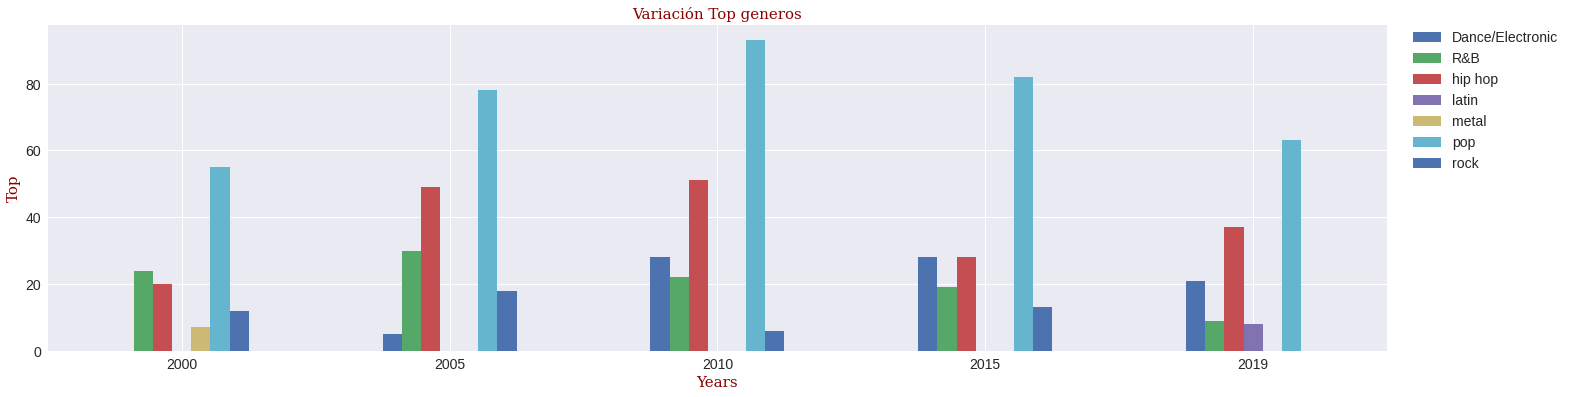

In [65]:
# transform the shape
dfp = top_genre.pivot(index='year', columns='genre', values='top')

# plot
ax = dfp.plot(kind='bar', rot=0, figsize=(24, 6))
font = {'family':'serif','color':'darkred','size':15}
plt.xlabel("Years", font)
plt.ylabel("Top", font)
plt.title("Variación Top generos", font)
ax.legend(bbox_to_anchor=(1.01, 1.02), loc='upper left', fontsize=14)
plt.style.use('seaborn')
plt.tick_params(labelsize=14)
plt.show()

5. ¿Cómo ha sido la progresión de nuevos artistas? Asuma que un artista nuevo es aquel del cual no se tiene registros pasados y solo es nuevo durante el primer año de aparición.

In [66]:
# Create new dataframe with columns year and artist
df_artist = df_genre_exp[['year','artist']]
df_artist = df_artist.groupby(['artist','year']).agg({'artist': ['count']})
df_artist.reset_index(inplace=True)
df_artist.columns = ['artist','year','count']

In [67]:
# Sort dataframe
df_artist = df_artist.sort_values(['artist','year','count'], ascending=[True,True, False]).groupby(['artist']).head(1)
df_artist = df_artist.groupby(['year']).agg({'artist': ['count']})

df_artist.reset_index(inplace=True)
df_artist.columns = ['year','count']

In [68]:
iplot(px.bar(df_artist,
       title='Progresión de nuevos artistas',
       
       x='year', 
       y='count',
       text_auto='.2s',
       labels=dict(index='year',value='Número de artistas'),
       color_discrete_sequence=['#2fece9'],
       width= 1400,
       height= 600
      ).update_xaxes(type='category'))

La gráfica muestra el número de artistas por año, realicé una agrupación por artista y por año tomando unicamente el primer año por artista y contando el número de artistas nuevos en cada año. Es importante resaltar que para los años 1998 y 2020 no hay casi datos por lo cual los datos no son representativos en la gráfica.

6. Grafique la progresión de la popularidad promedio por género y por año. Concluya sobre la gráfica, ej: ¿existen tendencias?

In [69]:
popularity_df = df_genre_exp[['genre','year','popularity']]
popularity_df = popularity_df.groupby(['genre','year']).agg({'popularity': ['mean']})

popularity_df.reset_index(inplace=True)
popularity_df.columns = ['genre','year','popularity_mean']

popularity_df_first = popularity_df[(popularity_df['genre'].isin(['hip hop', 'latin', 'metal', 'pop']))]

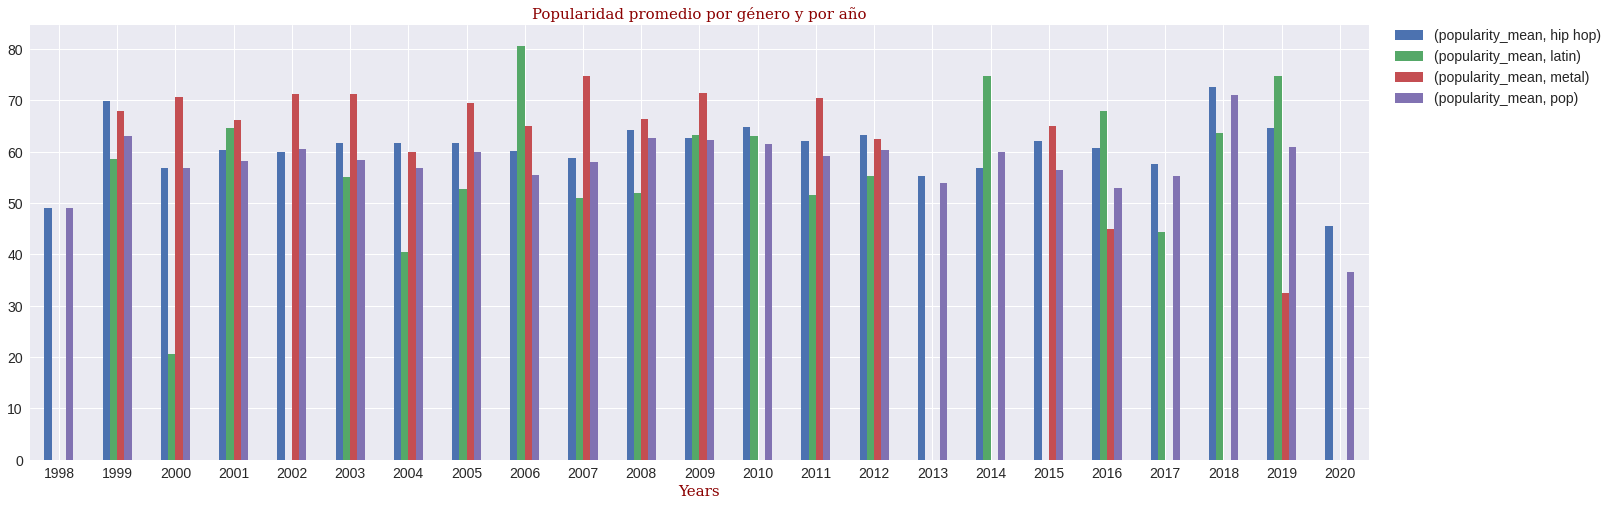

In [70]:
# transform the shape
dfp = popularity_df_first.pivot(index='year', columns='genre', values=['popularity_mean'])

# plot
ax = dfp.plot(kind='bar', rot=0, figsize=(24, 8))
font = {'family':'serif','color':'darkred','size':15}
plt.xlabel("Years", font)
plt.title("Popularidad promedio por género y por año", font)
ax.legend(bbox_to_anchor=(1.01, 1.02), loc='upper left', fontsize=14)
plt.style.use('seaborn')
plt.tick_params(labelsize=14)
plt.show()

In [71]:
popularity_df_second = popularity_df[(popularity_df['genre'].isin(['Dance/Electronic', 'R&B', 'latin', 'rock']))]

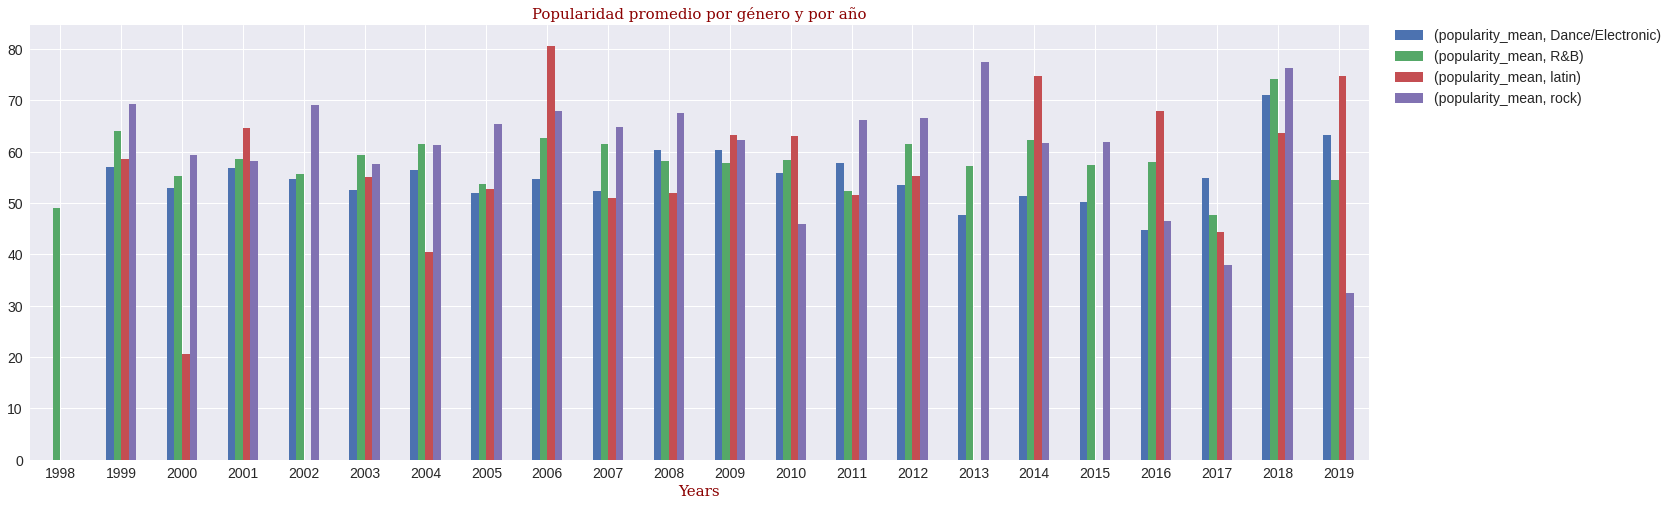

In [72]:
# transform the shape
dfp = popularity_df_second.pivot(index='year', columns='genre', values=['popularity_mean'])

# plot
ax = dfp.plot(kind='bar', rot=0, figsize=(24, 8))
font = {'family':'serif','color':'darkred','size':15}
plt.xlabel("Years", font)
plt.title("Popularidad promedio por género y por año", font)
ax.legend(bbox_to_anchor=(1.01, 1.02), loc='upper left', fontsize=14)
plt.style.use('seaborn')
plt.tick_params(labelsize=14)
plt.show()

Fue un poco dificil graficar toda la información ya que si se visualizaba toda en un unico gráfico no era posible interpretarla. Por lo anterior decidí dividir el dataframe en dos dataframe por medio de los géneros.

7. Compare los géneros Pop y Rock según sus características de: energy, valence y tempo.
Concluya sobre su análisis.

In [73]:
pop_rock_df = df_genre_exp[((df_genre_exp['genre'] == 'pop') | (df_genre_exp['genre'] == 'rock')) & (df_genre_exp['year'] > 1998)]
pop_rock_df['tempo'] = pop_rock_df['tempo']/60
pop_rock_df = pop_rock_df[['year','genre','energy','valence','tempo']]

pop_rock_df = pop_rock_df.groupby(['year','genre']).agg({'energy': ['mean'], 'valence': ['mean'], 'tempo': ['mean']})
pop_rock_df.reset_index(inplace=True)
pop_rock_df.columns = ['year','genre','energy','valence','tempo']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



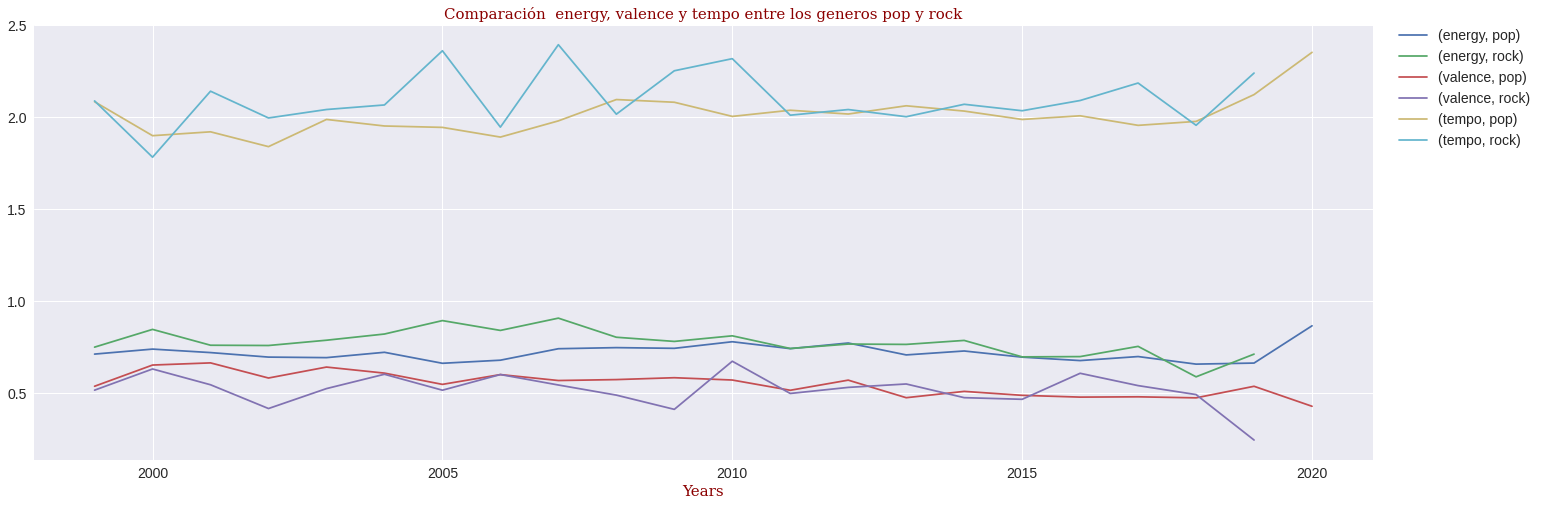

In [74]:
# transform the shape
dfp = pop_rock_df.pivot(index='year', columns='genre', values=['energy','valence','tempo'])

# plot
ax = dfp.plot(kind='line', rot=0, figsize=(24, 8))
font = {'family':'serif','color':'darkred','size':15}
plt.xlabel("Years", font)
plt.title("Comparación  energy, valence y tempo entre los generos pop y rock", font)
ax.legend(bbox_to_anchor=(1.01, 1.02), loc='upper left', fontsize=14)
plt.style.use('seaborn')
plt.tick_params(labelsize=14)
plt.show()

Se analizaron los datos desde el año 1999 por que en 1998 no estaban dos generos y no podia ver realmente la comparación. La columna tempo se dividió por 60 para tener la misma escala de los datos y realizar la comparación respectiva. Decidí agrupar por año ya que pordría ver a lo largo del tiempo las diferentes tendencias de cada una de las características valance, tempo y energy. Puedo concluir que el promedio de tempo era diferente entre los dos géneros en los primeros años y posteriormente casi similares.

Referente al valance entre los dos generos se observa que son casi similares y tienen casi las mismas tendencias. Tambien ocurre lo mimos con la característica energy.

8. Plantee una pregunta de negocio de su interés, ya sea por tipo de música, artistas u otra dimensión, mediante la cual se analicen al menos 3 variables del dataset y concluya.

In [75]:
duration_df = df_genre_exp[['year','acousticness','speechiness']]
duration_df = duration_df.groupby(['year']).agg({'acousticness': ['mean'], 'speechiness': ['mean']})
duration_df.reset_index(inplace=True)
duration_df.columns = ['year','acousticness', 'speechiness']

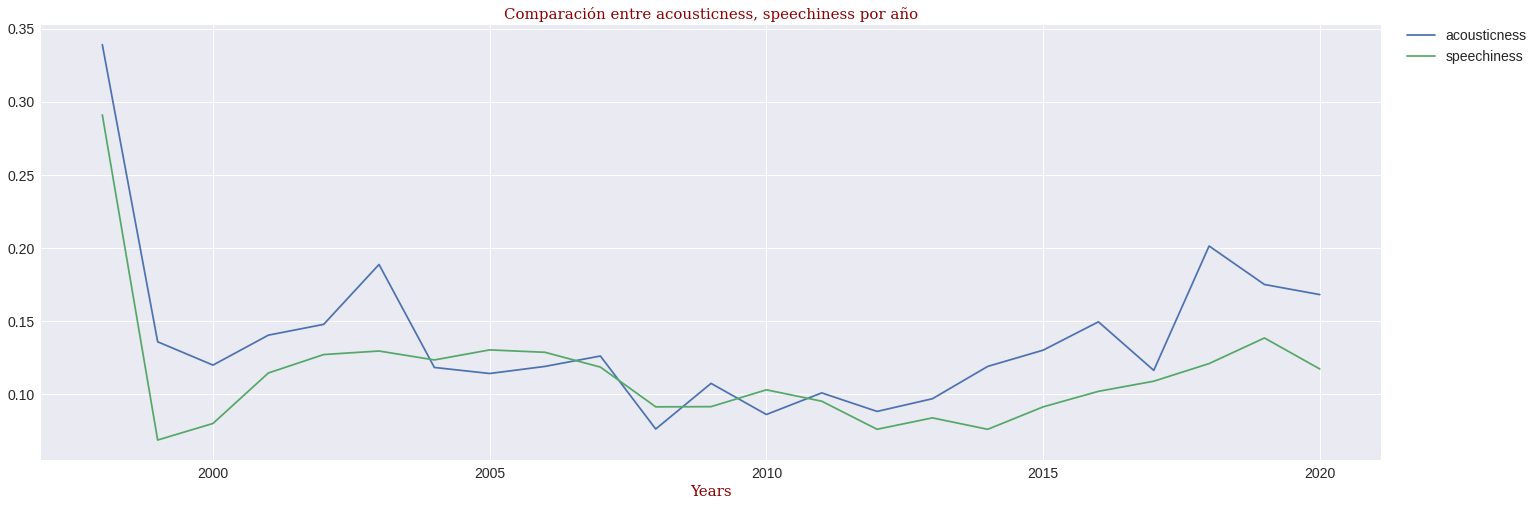

In [76]:

# plot
ax = plt.gca()
duration_df.plot(kind='line', x='year', y='acousticness', rot=0, figsize=(24, 8), ax=ax)
duration_df.plot(kind='line', x='year', y='speechiness', rot=0, figsize=(24, 8), ax=ax)
font = {'family':'serif','color':'darkred','size':15}
plt.xlabel("Years", font)
plt.title("Comparación entre acousticness, speechiness por año", font)
ax.legend(bbox_to_anchor=(1.01, 1.02), loc='upper left', fontsize=14)
plt.style.use('seaborn')
plt.tick_params(labelsize=14)
plt.show()

Pregunta: Existe alguna similitud entre el promedio de acousticness y speechiness de todas las canciones? 

Conclusión: el speechness representa la presencia de palabras habladas en una pista. Cuanto más parecida a la voz sea la grabación (por ejemplo, programa de entrevistas, audiolibro, poesía), más cerca de 1,0 será el valor del atributo y la propiedad acousticness representa una medida de confianza de 0,0 a 1,0 de si la pista es acústica. 1.0 representa una alta confianza en que la pista es acústica. por lo anterior podemos concluir que al iniciar el nuevo siglo la forma como se construian las canciones tenian menos palablas habladas quizas mas y menos acustica, lo anterior puede dar por la apareción del POP en los años 2000.